In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix, classification_report,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC,SVR
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor


In [40]:
bat = pd.read_csv("E:\MachineLearing_SKillCrafters\Projects_ML\Machine Learning\IPL 2025 Analyst\\IPL2025Batters.csv")
bowl = pd.read_csv("E:\MachineLearing_SKillCrafters\Projects_ML\Machine Learning\IPL 2025 Analyst\\IPL2025Bowlers.csv")


In [41]:
bat.head(5)

,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,1,6,88,21
1,Surya Kumar Yadav,MI,717,16,16,5,73*,65.18,427,167.91,0,5,69,38
2,Virat Kohli,RCB,657,15,15,3,73*,54.75,454,144.71,0,8,66,19
3,Shubman Gill,GT,650,15,15,2,93*,50.00,417,155.87,0,6,62,24
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37


In [42]:
# Clean batting data
bat['AVG'] = bat['AVG'].replace('-', np.nan)
bat['HS'] = bat['HS'].astype(str).str.replace('*', '')

# Convert to numeric
numeric_cols = ['Runs', 'Matches', 'Inn', 'No', 'AVG', 'BF', 'SR', '100s', '50s', '4s', '6s']
for col in numeric_cols:
    bat[col] = pd.to_numeric(bat[col], errors='coerce')



In [43]:
bowl.head(5)

,Player Name,Team,WKT,MAT,INN,OVR,RUNS,BBI,AVG,ECO,SR,4W,5W
0,Prasidh Krishna,GT,25,15,15,59.0,488,41/4,19.52,8.27,14.16,1,0
1,Noor Ahmad,CSK,24,14,14,50.0,408,18/4,17.00,8.16,12.50,2,0
2,Josh Hazlewood,RCB,22,12,12,44.0,386,33/4,17.54,8.77,12.00,1,0
3,Trent Boult,MI,22,16,16,57.4,517,26/4,23.50,8.96,15.72,1,0
4,Arshdeep Singh,PBKS,21,17,16,58.2,518,16/3,24.66,8.88,16.66,0,0


In [44]:
print(bat.info())
print(bowl.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player Name  156 non-null    object 
 1   Team         156 non-null    object 
 2   Runs         156 non-null    int64  
 3   Matches      156 non-null    int64  
 4   Inn          156 non-null    int64  
 5   No           156 non-null    int64  
 6   HS           156 non-null    object 
 7   AVG          141 non-null    float64
 8   BF           156 non-null    int64  
 9   SR           156 non-null    float64
 10  100s         156 non-null    int64  
 11  50s          156 non-null    int64  
 12  4s           156 non-null    int64  
 13  6s           156 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 17.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ---

In [45]:
print("bat",bat.isna().sum())
print("bowl",bowl.isna().sum())

bat Player Name     0
Team            0
Runs            0
Matches         0
Inn             0
No              0
HS              0
AVG            15
BF              0
SR              0
100s            0
50s             0
4s              0
6s              0
dtype: int64
bowl Player Name    0
Team           0
WKT            0
MAT            0
INN            0
OVR            0
RUNS           0
BBI            0
AVG            0
ECO            0
SR             0
4W             0
5W             0
dtype: int64


In [46]:
bat.describe()
bowl.describe()

,WKT,MAT,INN,OVR,RUNS,AVG,ECO,SR,4W,5W
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,7.675926,8.444444,7.675926,24.727778,233.796296,40.108519,9.875093,23.820463,0.148148,0.018519
std,6.294678,4.914851,4.767155,17.507130,155.708916,26.919800,1.592371,13.551808,0.428316,0.135445
min,1.000000,1.000000,1.000000,1.000000,13.000000,6.500000,6.500000,5.000000,0.000000,0.000000
25%,2.000000,4.000000,3.750000,10.000000,98.750000,24.330000,8.822500,15.712500,0.000000,0.000000
50%,6.000000,9.000000,7.000000,19.500000,185.500000,31.830000,9.705000,21.000000,0.000000,0.000000
75%,12.250000,13.000000,12.000000,41.625000,376.750000,47.250000,10.937500,25.767500,0.000000,0.000000
max,25.000000,17.000000,16.000000,59.000000,527.000000,175.000000,14.100000,85.000000,2.000000,1.000000


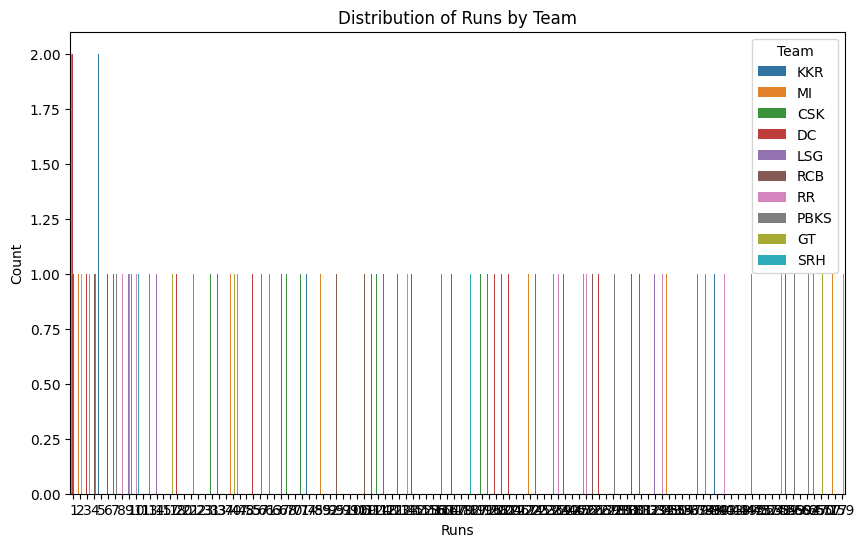

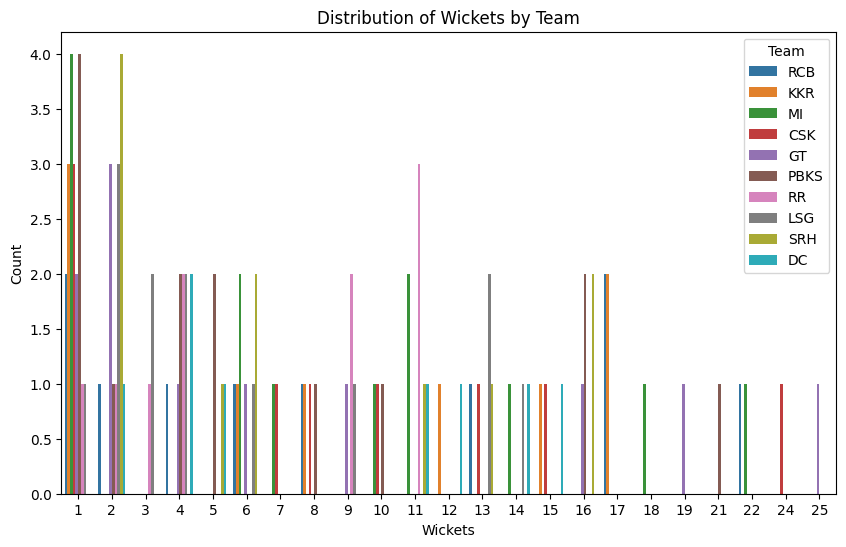

In [47]:
# visualization
plt.figure(figsize=(10, 6))
sns.countplot(data=bat, x='Runs', hue='Team')
plt.title('Distribution of Runs by Team')
plt.xlabel('Runs')
plt.ylabel('Count')
plt.legend(title='Team')
plt.figure(figsize=(10, 6))
sns.countplot(data=bowl, x='WKT', hue='Team')
plt.title('Distribution of Wickets by Team')
plt.xlabel('Wickets')
plt.ylabel('Count')
plt.legend(title='Team')
plt.show()

In [48]:
bat.describe()
bowl.describe()
bat_x =  bat[['Matches', 'Inn', 'No', '100s', '50s', '4s', '6s']].fillna(0)
bat_y = bat['Runs']

bowl_x = bowl[['MAT', 'INN', 'OVR', 'RUNS', '4W', '5W']]  
bowl_y = bowl['WKT']

# Splitting the data into training and testing sets
bat_x_train, bat_x_test, bat_y_train, bat_y_test = train_test_split(bat_x, bat_y, test_size=0.2, random_state=42)
bowl_x_train, bowl_x_test, bowl_y_train, bowl_y_test = train_test_split(bowl_x, bowl_y, test_size=0.2, random_state=42)
# Scaling the features
scaler = StandardScaler()
bat_x_train = scaler.fit_transform(bat_x_train)
bat_x_test = scaler.transform(bat_x_test)
bowl_x_train = scaler.fit_transform(bowl_x_train)
bowl_x_test = scaler.transform(bowl_x_test)
# Model training and evaluation for Batting
models_bat = {
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor()
}
results_bat = {}
for model_name, model in models_bat.items():
    model.fit(bat_x_train, bat_y_train)
    bat_y_pred = model.predict(bat_x_test)
    mse = mean_squared_error(bat_y_test, bat_y_pred)
    r2 = r2_score(bat_y_test, bat_y_pred)
    results_bat[model_name] = {'MSE': mse, 'R2': r2}
# Model training and evaluation for Bowling
models_bowl = {
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor()
}
results_bowl = {}
for model_name, model in models_bowl.items():
    model.fit(bowl_x_train, bowl_y_train)
    bowl_y_pred = model.predict(bowl_x_test)
    mse = mean_squared_error(bowl_y_test, bowl_y_pred)
    r2 = r2_score(bowl_y_test, bowl_y_pred)
    results_bowl[model_name] = {'MSE': mse, 'R2': r2}
# Displaying the results
print("Batting Model Results:")
for model_name, metrics in results_bat.items():
    print(f"{model_name}: MSE = {metrics['MSE']:.2f}, R2 = {metrics['R2']:.2f} ")
print("\nBowling Model Results:")
for model_name, metrics in results_bowl.items():
    print(f"{model_name}: MSE = {metrics['MSE']:.2f}, R2 = {metrics['R2']:.2f} ")
    

Batting Model Results:
Random Forest: MSE = 376.37, R2 = 0.99 
Support Vector Regression: MSE = 23780.02, R2 = 0.07 
Linear Regression: MSE = 472.75, R2 = 0.98 
K-Nearest Neighbors: MSE = 1853.06, R2 = 0.93 
Decision Tree: MSE = 1051.69, R2 = 0.96 

Bowling Model Results:
Random Forest: MSE = 9.61, R2 = 0.81 
Support Vector Regression: MSE = 11.73, R2 = 0.76 
Linear Regression: MSE = 8.09, R2 = 0.84 
K-Nearest Neighbors: MSE = 11.74, R2 = 0.76 
Decision Tree: MSE = 12.09, R2 = 0.76 


In [49]:
# grid search for hyperparameter tuning
param_grid_bat = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search_bat = GridSearchCV(RandomForestRegressor(), param_grid_bat, cv=5, scoring='neg_mean_squared_error')
grid_search_bat.fit(bat_x_train, bat_y_train)
print("Best parameters for Batting Model:", grid_search_bat.best_params_)
print("Best score for Batting Model:", grid_search_bat.best_score_)
# grid search for hyperparameter tuning for bowling
param_grid_bowl = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search_bowl = GridSearchCV(RandomForestRegressor(), param_grid_bowl, cv=5, scoring='neg_mean_squared_error')
grid_search_bowl.fit(bowl_x_train, bowl_y_train)
print("Best parameters for Bowling Model:", grid_search_bowl.best_params_)
print("Best score for Bowling Model:", grid_search_bowl.best_score_)


best_rf_bat = grid_search_bat.best_estimator_
best_rf_bowl = grid_search_bowl.best_estimator_

bat_y_pred_best = best_rf_bat.predict(bat_x_test)
bowl_y_pred_best = best_rf_bowl.predict(bowl_x_test)

print(f"Test R2 for Batting Model: {r2_score(bat_y_test, bat_y_pred_best):.2f}")



Best parameters for Batting Model: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best score for Batting Model: -1195.9126298710437
Best parameters for Bowling Model: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 50}
Best score for Bowling Model: -9.289648682570173
Test R2 for Batting Model: 0.99


In [50]:
new_player = [[15, 14, 2, 1, 5, 60, 25]]  # [Matches, Inn, No, 100s, 50s, 4s, 6s]
predicted_runs = best_rf_bat.predict(new_player)
print(f"Predicted runs: {predicted_runs[0]:.0f}")

new_bowler = [[10, 10, 40, 200, 2, 1]]  # [MAT, INN, OVR, RUNS, 4W, 5W]
predicted_wickets = best_rf_bowl.predict(new_bowler)
print(f"Predicted wickets: {predicted_wickets[0]:.0f}")


Predicted runs: 697
Predicted wickets: 18
